# Tarea 04: Máquinas de soporte vectorial

En la carpeta de data https://github.com/scidatmath2020/ML_Py_23/tree/main/data   encontrarás la tabla datos_cancer.csv. Aplica MSV para clasificar la variable de diagnóstico. Utiliza como predictores únicamente las columas que midan algún promedio (son 10).

¿Crees que se trate de clases balanceadas o desbalanceadas? Recuerda que en el tema de regresión logística vimos cómo contar los elementos de cada clase mediante group_by de siuba y la función n(_) de siuba.dply.vector.

¿Cuál es la máquina que mejor clasifica?

In [1]:
# Importamos las librerías estandar para manipular nuestro dataframe
import os
import pandas as pd
import numpy as np
from siuba import *
from siuba.dply.vector import * 
from plotnine import *

In [2]:
######### Importar datos ##########

# Importamos los datos sobre los tumores benignos y malignos desde Github
mi_data = pd.read_csv('https://raw.githubusercontent.com/scidatmath2020/ML_Py_23/main/data/cancer_mama.csv')
# Visualizamos las primeras 5 filas
mi_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# En este dataset los tumores malignos de 'diagnosis' tienen valor cero. Para trabajar cambiaremos eso.
# Cambiamos el valor original tumor_maligno=0 --> tumor_maligno=1
# También hacemos tumor_benigno=0 --> tumor_benigno=0
mi_data = mi_data >> mutate(diagnosis=_.diagnosis.replace({0:1, 1:0}))

In [4]:
# Ahora chequemos si la clase 'diagnosis' es balanceada o desbalanceada
mi_data >> group_by(_.diagnosis) >> summarize(total = n(_))

,diagnosis,total
0,0,357
1,1,212


Aunque los totales de las clases no son iguales, podemos considerarlas como balanceadas. Así que procesos a aplicar nuestro modelo directamente.

In [5]:
######### Máquinas de soporte vectorial ##########

# Vamos aplicar a la tabla el modelo de 'máquinas de soporte vectorial', así que importamos la librería 
# correspondiente de sklearn.
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [7]:
# Definimos como X al dataframe con los valores independientes. Estos son todas las columnas excepto 'diagnosis'.
# Pero hay que recordar que solo usaremos las columnas que representan algún promedio. Por tanto, usamos 
# el parametro regex='mean'
X = mi_data.filter(regex = 'mean', axis=1)

# Definimos como y al dataframe con los valores objetivo, los cuales se encuentran en la columna 'diagnosis'
y =  mi_data >> select(_.diagnosis)

In [18]:
# Empezamos definiendo el modelo de máquina de soporte vectorial de forma arbitraria,
# es decir, no especificamos parámetros
model_svm = SVC()
# Entrenamos al modelo
model_svm.fit(X, y)
# Para medir la efectividad de nuestro modelo usamos el score 'f1_micro' pues estamos
# suponiendo que las clases están balanceadas. . 
# Así, medimos esto usando validación cruzada, con 40 iteraciones, y calculamos el promedio de
# todas las medidas obtenidas.
cross_val_score(model_svm,
                X,
                y.values.ravel(),
                cv=40,
                scoring="f1_micro").mean()

c:\Users\wikki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.8870238095238097

In [33]:
# Para darnos una idea de como se hizo la clasificación anterior vamos a graficar.
# Para ello usamos la siguiente librería
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Como tenemos 10 columnas, solo seleccionaremos 2 de ellas. Recordemos que la gráfica es 
# solo para darnos una idea del método. De la tabla 'X' seleccionamos las primeras dos columnas
X_rd = X >> select(0, 1)
X_rd.head()

,mean_radius,mean_texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


c:\Users\wikki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\Users\wikki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names


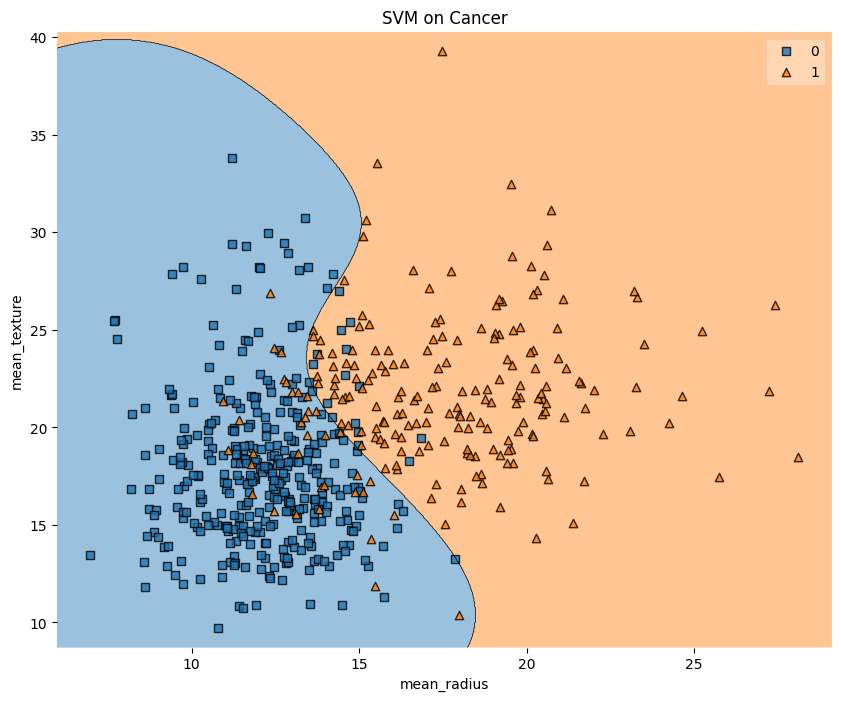

In [35]:
# Entrenamos al modelo con nuestra tabla reducida 'X_rd'.
model_svm.fit(X_rd, y)

# Graficamos la clasificación que nos da el modelo
fig = plt.figure(figsize=(10,8))
plot_decision_regions(X_rd.to_numpy(), y.values.ravel(), clf=model_svm)
plt.xlabel(X_rd.columns[0])
plt.ylabel(X_rd.columns[1])
plt.title('SVM on Cancer')
plt.show()

Ya que tenemos una idea de como aplicar el modelo al dataset. Lo siguiente es reponder a la pregunta, ¿cuál es la máquina que mejor clasifica a los datos del cáncer? Para lo anterior vamos a checar al modelo con distintos parámetros.

In [36]:
model_svm_lineal = SVC(kernel="linear")
model_svm_lineal.fit(X, y.values.ravel())
cross_val_score(model_svm_lineal, X, y.values.ravel(), cv=40, scoring="f1_micro").mean()

0.9165476190476192

In [37]:
model_svm_poli2 = SVC(kernel="poly", degree=2)
model_svm_poli2.fit(X, y.values.ravel())
cross_val_score(model_svm_poli2, X, y.values.ravel(), cv=40, scoring="f1_micro").mean()

0.8957142857142857

In [38]:
model_svm_poli3 = SVC(kernel="poly", degree=3)
model_svm_poli3.fit(X, y.values.ravel())
cross_val_score(model_svm_poli3, X, y.values.ravel(), cv=40, scoring="f1_micro").mean()

0.8888095238095239

In [40]:
model_svm_poli4 = SVC(kernel="poly", degree=4)
model_svm_poli4.fit(X, y.values.ravel())
cross_val_score(model_svm_poli4, X, y.values.ravel(), cv=40, scoring="f1_micro").mean()

0.8853571428571427

In [41]:
model_svm_rbf = SVC(kernel="rbf")
model_svm_rbf.fit(X, y.values.ravel())
cross_val_score(model_svm_rbf, X, y.values.ravel(),cv=40, scoring="f1_micro").mean()

0.8870238095238097

In [42]:
model_svm_rbf_0_1 = SVC(kernel="rbf", gamma=0.1)
model_svm_rbf_0_1.fit(X, y.values.ravel())
cross_val_score(model_svm_rbf_0_1, X, y.values.ravel(), cv=40, scoring="f1_micro").mean()

0.7298809523809524

In [43]:
model_svm_rbf_10 = SVC(kernel="rbf", gamma=10)
model_svm_rbf_10.fit(X, y.values.ravel())
cross_val_score(model_svm_rbf_10, X, y.values.ravel(), cv=40, scoring="f1_micro").mean()

0.6278571428571429

In [44]:
model_svm_rbf_100 = SVC(kernel="rbf", gamma=100)
model_svm_rbf_100.fit(X, y.values.ravel())
cross_val_score(model_svm_rbf_100, X, y.values.ravel(), cv=40, scoring="f1_micro").mean()

0.6278571428571429

De los distintos modelos que probamos, encontramos que el kernel 'lineal', es el que mejor ajusta a los datos del cáncer. 

c:\Users\wikki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\Users\wikki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names


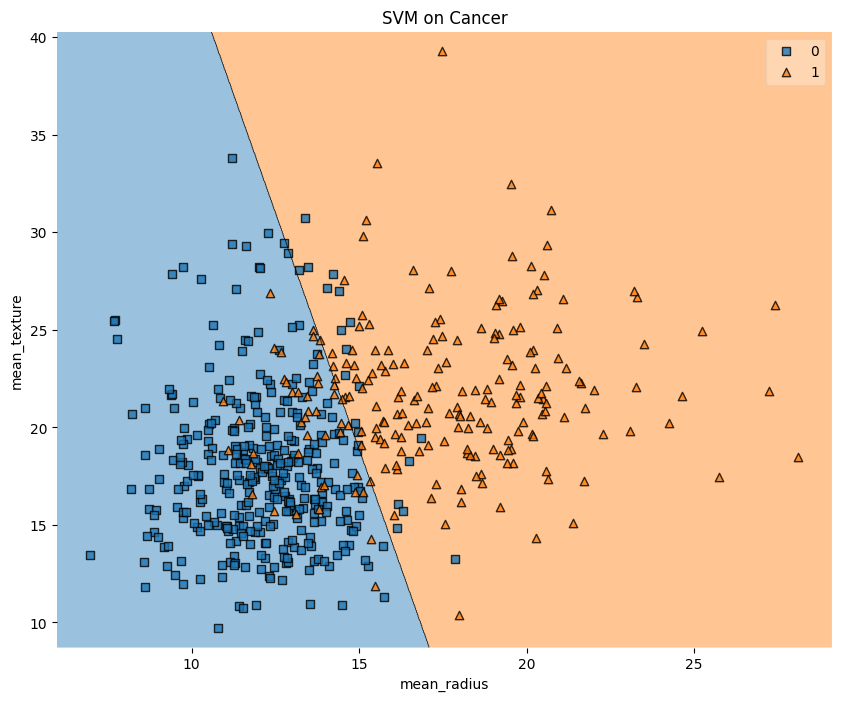

In [45]:
# Entrenamos al modelo que mejor se ajusya con nuestra tabla reducida 'X_rd'. Esto para poder hacer una gráfica
model_svm_lineal.fit(X_rd, y)

# Graficamos la clasificación que nos da el modelo
fig = plt.figure(figsize=(10,8))
plot_decision_regions(X_rd.to_numpy(), y.values.ravel(), clf=model_svm_lineal)
plt.xlabel(X_rd.columns[0])
plt.ylabel(X_rd.columns[1])
plt.title('SVM on Cancer')
plt.show()